### Ryan Gilbert
### CMP 262-56145
### Project 2

# Purpose and Objectives

## For this project, the website 'Hockey-Reference' was used in order to set-up a scraping pipeline to scrape data. Five different affiliated webpages from that site were used, each to answer specific questions about the data that they each contained. Once the data is successfully scraped, it is then converted into a Pandas Data-Frame. Finally, data analysis is then performed, several of each will include visualizations from Seaborn.

## Initial Set-Up and establishing a method to webscrape the 'Hockey-Reference' data tables

### Import all packages needed for Web-Scraping

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

### Using Requests with first Hockey-Reference webpage, which includes the 2024-2025 NHL Skater Statistics

In [2]:
url = "https://www.hockey-reference.com/leagues/NHL_2025_skaters.html"

In [3]:
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

### Checking to make sure that the 'soup' variable is of the correct data type

In [4]:
type(soup)

bs4.BeautifulSoup

In [5]:
stats_table = soup.find(class_='stats_table').tbody

### Checking to make sure that the correct data table was scraped from the webpage

In [6]:
print(stats_table)

<tbody><tr> <th class="right" csk="1" data-stat="ranker" scope="row">1</th> <td class="left" csk="Kucherov Nikita-1" data-append-csv="kucheni01" data-stat="name_display"><a href="/players/k/kucheni01.html">Nikita Kucherov</a></td> <td class="right" data-stat="age">31</td> <td class="left" data-stat="team_name_abbr"><a href="/teams/TBL/2025.html">TBL</a></td> <td class="left" data-stat="pos">RW</td> <td class="right" data-stat="games">78</td> <td class="right" csk="37" data-stat="goals">37</td> <td class="right" csk="84" data-stat="assists"><strong>84</strong></td> <td class="right" csk="121" data-stat="points"><strong>121</strong></td> <td class="right" csk="22" data-stat="plus_minus">22</td> <td class="right" csk="45" data-stat="pen_min">45</td> <td class="right" csk="29" data-stat="goals_ev">29</td> <td class="right" csk="8" data-stat="goals_pp">8</td> <td class="right iz" csk="0" data-stat="goals_sh">0</td> <td class="right" csk="9" data-stat="goals_gw">9</td> <td class="right" csk=

### Creating an empty list to store the names of the players, finding the players by checking each row, including checking 'th' and 'td' HTML code where data-stat=name_display, since there are occaissons where the name appears in a <th> cell and others where it appears in <td>. 

### The next loop checks and makes sure that a player's name is included in that row, since there was an empty row of values on top and bottom of the data-frame, as well as a 'League Average' row and others that don't correspond to a single player. The remaining rows of players' names are then 'stripped' or extracted from the row 

In [7]:
players = []

for row in stats_table.find_all("tr"):
    name_cell = row.find(["th", "td"], {"data-stat": "name_display"})
    if name_cell:
        name = name_cell.text.strip()
        # Skip "League Average" or empty rows
        if name and "League Average" not in name:
            players.append(name)

### Doing a quick check here to confirm the names of the players were all successfully extracted.

In [8]:
print(players)

['Nikita Kucherov', 'Nathan MacKinnon', 'Leon Draisaitl', 'David PastrÅ\x88Ã¡k', 'Mitch Marner', 'Connor McDavid', 'Kyle Connor', 'Jack Eichel', 'Cale Makar', 'Sidney Crosby', 'Brandon Hagel', 'Clayton Keller', 'Artemi Panarin', 'Nick Suzuki', 'Jesper Bratt', 'Mikko Rantanen', 'Mikko Rantanen', 'Mikko Rantanen', 'Mikko Rantanen', 'Mark Scheifele', 'William Nylander', 'Martin NeÄ\x8das', 'Martin NeÄ\x8das', 'Martin NeÄ\x8das', 'Matt Duchene', 'Brayden Point', 'Dylan Strome', 'Zach Werenski', 'Sam Reinhart', 'Robert Thomas', 'Jake Guentzel', 'Lucas Raymond', 'Jason Robertson', 'Tim StÃ¼tzle', 'Auston Matthews', 'Filip Forsberg', 'Quinn Hughes', 'Travis Konecny', 'Sebastian Aho', 'Kirill Marchenko', 'John Tavares', 'Matt Boldy', 'Adrian Kempe', 'Alex Ovechkin', 'Tage Thompson', 'Aleksander Barkov', 'Wyatt Johnston', 'Cole Caufield', 'Alex DeBrincat', 'Jack Hughes', 'Jordan Kyrou', 'Dylan Larkin', 'Rickard Rakell', 'J.T. Miller', 'J.T. Miller', 'J.T. Miller', 'Nico Hischier', 'Drake Bather

# Question 1: Of the Top 50 Goal Scorers from the 2024-2025 NHL Season, what Percentage of their Goals Scored come from Even Strength Goals vs from the PowerPlay?

### Now that a method to scrape the website has been established, a similar set of loops are created to the one above. Prior to executing that loop, a set of 'selected stats' are established, as there are more than 30 columns of data, and to answer the question posed, only 4 of them will be used.

In [9]:
selected_stats = ["name_display", "goals", "goals_ev", "goals_pp"]

all_rows = []

In [10]:
#Getting the data from the right table
for row in stats_table.find_all("tr"):
    row_data = {}
#Checking against <th> and <td> cells
    cells = row.find_all(["th", "td"])
#Similar loop to one used above. 
#Major difference is now instead of just getting name_display, each of the four 'selected_stats' are checked. 
    for cell in cells:
        stat = cell.get("data-stat")
        if stat in selected_stats:
            row_data[stat] = cell.text.strip()
    if row_data.get("name_display") and "League Average" not in row_data["name_display"]:
        all_rows.append(row_data)


In [11]:
skater_df = pd.DataFrame(all_rows)

for col in ["goals", "goals_ev", "goals_pp"]:
    skater_df[col] = pd.to_numeric(skater_df[col], errors='coerce').fillna(0).astype(int)

### Checking Data-Frame to confirm current number of rows and that each of the four columns display.

In [12]:
print(skater_df)

          name_display  goals  goals_ev  goals_pp
0      Nikita Kucherov     37        29         8
1     Nathan MacKinnon     32        23         9
2       Leon Draisaitl     52        36        16
3     David PastrÅÃ¡k     43        34         9
4         Mitch Marner     27        20         6
...                ...    ...       ...       ...
1245   Scott Wedgewood      0         0         0
1246   Scott Wedgewood      0         0         0
1247       Colin White      0         0         0
1248     Jack Williams      0         0         0
1249       Joseph Woll      0         0         0

[1250 rows x 4 columns]


### Next, the data-frame will be updated to only include the top 50 Goal Scorers in the NHL, which is being defined as the 50 players with the most goals scored in the 2024-2025 NHL season.

In [13]:
top_50_skater_df = skater_df.sort_values(by="goals", ascending=False).head(50)

In [14]:
print(top_50_skater_df)

         name_display  goals  goals_ev  goals_pp
2      Leon Draisaitl     52        36        16
20   William Nylander     45        33        12
43      Alex Ovechkin     44        30        14
44      Tage Thompson     44        37         7
3    David PastrÅÃ¡k     43        34         9
25      Brayden Point     42        26        16
30      Jake Guentzel     41        23        17
6         Kyle Connor     41        30         9
28       Sam Reinhart     39        21        13
19     Mark Scheifele     39        28        11
48     Alex DeBrincat     39        26        13
40       John Tavares     38        26        12
0     Nikita Kucherov     37        29         8
47      Cole Caufield     37        27        10
12     Artemi Panarin     37        29         8
50       Jordan Kyrou     36        29         7
67          Alex Tuch     36        27         3
42       Adrian Kempe     35        27         7
32    Jason Robertson     35        26         9
129   Pavel Dorofeye

### Confirming size of new Data Frame to have 50 rows

In [15]:
top_50_skater_df.shape

(50, 4)

### Adding in extra columns to the Data-Frame to represent the percentage of Even-Strength Goals/Goals and Power-Play Goals/Goals respectively prior to creating a KDE Plot.

In [16]:
top_50_skater_df["ev_pct"] = (top_50_skater_df["goals_ev"] / top_50_skater_df["goals"]) * 100
top_50_skater_df["pp_pct"] = (top_50_skater_df["goals_pp"] / top_50_skater_df["goals"]) * 100

In [17]:
sns.set(style="whitegrid")

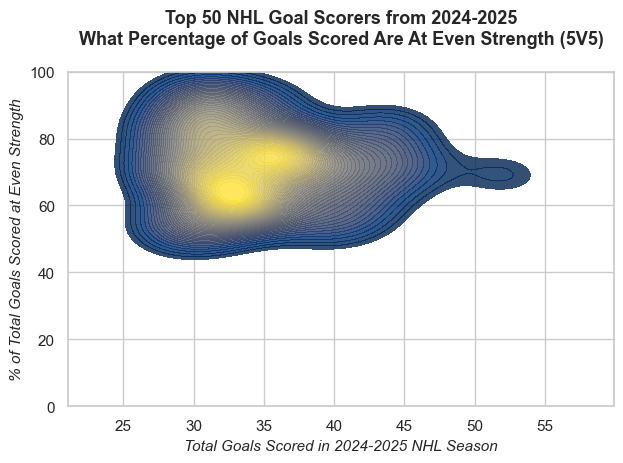

In [18]:
#Starting with the graph for the Even Strength Goals Percentage relative to the Total Goals Scored
sns.kdeplot(
    data=top_50_skater_df,
    x="goals",
    y="ev_pct",
#Want to fill in the colors rather than just leaving them outlined to show relative frequencies of skaters 
    fill=True,
    cmap="cividis",
#Show everything, starting if 0% of goals scored are Even Strength
    thresh=0.05,
#Adjusting how many lines of density there are and how opaque/transparent the filled colors are respectively
    levels=50,
    alpha=0.8
)

#Setting the Title for the Graph and Labels for the Axes as well as the YMin/YMax
#For the title, because it was two lines, in addition to changing the Font Size and Making it Bold, a 'Pad' Parameter
# was used
plt.title("Top 50 NHL Goal Scorers from 2024-2025\nWhat Percentage of Goals Scored Are At Even Strength (5V5)", 
          fontsize=13, fontweight='bold', fontfamily='sans-serif', pad=20)
plt.xlabel("Total Goals Scored in 2024-2025 NHL Season", fontsize = 11, fontstyle='italic', 
           fontfamily='sans-serif')
plt.ylabel("% of Total Goals Scored at Even Strength", fontsize = 11, fontstyle='italic',
           fontfamily='sans-serif' )
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

## From this graph, it is clear that among those Top 50 Goal Scorers, the majority of them scored between 30 and 40 goals and that between 60-80% of their goals that were scored were at Even Strength

### Following the same process and Steps to Show the Percentage of Goals Scored that were PowerPlay Goals

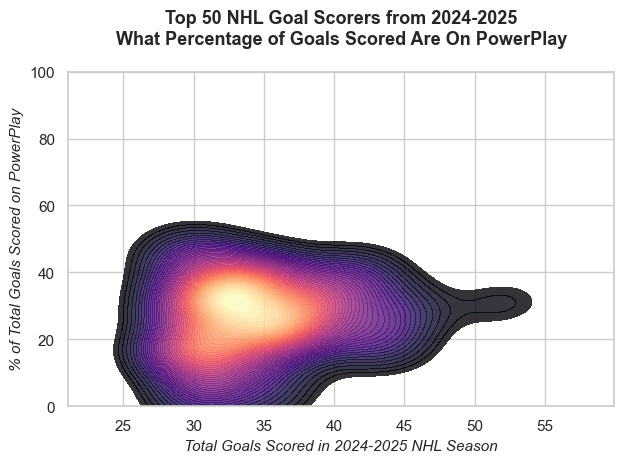

In [19]:
sns.kdeplot(
    data=top_50_skater_df,
    x="goals",
    y="pp_pct",
    fill=True,
    cmap="magma",
    thresh=0.05,
    levels=50,
    alpha=0.8
)

#Setting the Title for the Graph and Labels for the Axes as well as the YMin/YMax
#For the title, because it was two lines, in addition to changing the Font Size and Making it Bold, a 'Pad' Parameter
# was used
plt.title("Top 50 NHL Goal Scorers from 2024-2025\nWhat Percentage of Goals Scored Are On PowerPlay", 
          fontsize=13, fontweight='bold', fontfamily='sans-serif', pad=20)
plt.xlabel("Total Goals Scored in 2024-2025 NHL Season", fontsize = 11, fontstyle='italic', 
           fontfamily='sans-serif')
plt.ylabel("% of Total Goals Scored on PowerPlay", fontsize = 11, fontstyle='italic',
           fontfamily='sans-serif' )
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

## This Visualization Reaffirms that the Average Number of Goals Scored in this Group is Between 30-40, and that the Percentage of Goals Scored on the PowerPlay is Between 20-40% 

# Of the Top 50 Goal Scorers from the 2024-2025 NHL Season, an Average of 30% of their Goals Scored were Scored on the PowerPlay and an Average of 70% of the Goals Scored Were at Even-Strength.

# Question 2: For those goalies who started the majority of games for their team (41+) in the 2024-2025 season, who were the top five goalies in Goals Saved Above Expected? And did this translate into those same goalies receiving the most Vezina Trophy votes?

### Updating the URL to be Scraped in Order to Answer Question 2

In [20]:
url = "https://www.hockey-reference.com/leagues/NHL_2025_goalies.html"
response = requests.get(url)
soup = bs(response.content, "html.parser")

In [21]:
stats_table = soup.find("table", {"id": "goalie_stats"})

### Checking to make sure that the URL was successfully Updated

In [22]:
print(stats_table)

<table class="stats_table sortable per_toggler soc" data-autostat-divisor="goalie_games" data-autostat-list="['goalie_goals_against','shots_against_goalie','goalie_saves','goalie_min','gs_above_avg','gps','goals','assists','points','pen_min']" data-cols-to-freeze="2,4" data-non-qual="1" data-qual-label=" When table is sorted, hide non-qualifiers for rate stats" data-qual-text="" data-soc-sum-params="null" data-soc-sum-phase-type="reg" data-soc-sum-scope-type="player_season" data-soc-sum-table-type="GoalieStandard" id="goalie_stats"> <caption>Goalie Stats Table</caption> <colgroup><col/><col/><col/><col/><col/><col class="sort_col"/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr class="over_header"> <th aria-label=" " class="poptip over_header center" colspan="5" data-stat="header_empty_0"></th> <th aria-label="Goalie Stats" class="poptip over_header center" colspan="19" da

### Selecting which Columns Will be Used to Answer the Question

In [23]:
goalie_stats = ["name_display", "goalie_starts", "gs_above_avg"]

In [24]:
goalie_rows = []

#Same format as previous link. Some of the data needed comes from <th> cells, others from <td> from each row.
for row in stats_table.find_all("tr"):
    row_data = {}
    cells = row.find_all(["th", "td"])
    for cell in cells:
        stat = cell.get("data-stat")
#Loop checking to make sure that the stat being used is from the list of 'goalie_stats' declared above.
#Once confirmed, that text from that cell is then stripped and an additional row is added to the row data dictionary.
        if stat in goalie_stats:
            row_data[stat] = cell.text.strip()
#Only adding those rows that have data in them, no rows with blanks for each data, no rows that show accumulations, as in the original table.
    if row_data.get("name_display") and "League Average" not in row_data["name_display"]:
        goalie_rows.append(row_data)

### Creating a new DataFrame that will Include all of the Data Collected from the Loop above

In [25]:
goalie_df = pd.DataFrame(goalie_rows)

### Need to convert the data from string to numeric data

In [26]:
goalie_df["goalie_starts"] = pd.to_numeric(goalie_df["goalie_starts"], errors="coerce")
goalie_df["gs_above_avg"] = pd.to_numeric(goalie_df["gs_above_avg"], errors="coerce")

In [27]:
print(goalie_df)

           name_display  goalie_starts  gs_above_avg
0                Player            NaN           NaN
1     Connor Hellebuyck           62.0          41.6
2    Andrei Vasilevskiy           63.0          35.8
3      Sam Montembeault           60.0           2.1
4       Igor Shesterkin           61.0           8.4
..                  ...            ...           ...
117       Erik Portillo            1.0           1.9
118      Hunter Shepard            1.0          -4.4
119      Clay Stevenson            1.0          -1.2
120         Ales Stezka            1.0          -0.7
121       Matt Villalta            1.0           0.1

[122 rows x 3 columns]


### Removing the additional Row at the top 'Player', since it does not hold any real values.

In [28]:
goalie_df = goalie_df[goalie_df["name_display"] != "Player"]

### Checking the Updated Data Frame to Confirm there are 121 Rows and that the one at the top has been removed

In [29]:
print(goalie_df)

           name_display  goalie_starts  gs_above_avg
1     Connor Hellebuyck           62.0          41.6
2    Andrei Vasilevskiy           63.0          35.8
3      Sam Montembeault           60.0           2.1
4       Igor Shesterkin           61.0           8.4
5          Ilya Sorokin           60.0          11.7
..                  ...            ...           ...
117       Erik Portillo            1.0           1.9
118      Hunter Shepard            1.0          -4.4
119      Clay Stevenson            1.0          -1.2
120         Ales Stezka            1.0          -0.7
121       Matt Villalta            1.0           0.1

[121 rows x 3 columns]


### Creating an Updated Data Frame to Include Only Starting Goaltenders (Who Have 41+ Starts over an 82 Game Season)

In [30]:
starting_goalies_df = goalie_df[goalie_df["goalie_starts"] >= 41]

### Checking to see how many Goalies Remain in the Updated Data-Frame before Plotting

In [31]:
print(starting_goalies_df)

            name_display  goalie_starts  gs_above_avg
1      Connor Hellebuyck           62.0          41.6
2     Andrei Vasilevskiy           63.0          35.8
3       Sam Montembeault           60.0           2.1
4        Igor Shesterkin           61.0           8.4
5           Ilya Sorokin           60.0          11.7
6       Filip Gustavsson           58.0          23.4
7         Jake Oettinger           58.0          14.3
8            Juuse Saros           58.0          -7.6
9         Jeremy Swayman           58.0         -12.6
10        Karel Vejmelka           55.0           5.9
11          Joey Daccord           55.0           9.1
12     Jordan Binnington           54.0           0.9
13   Mackenzie Blackwood           53.0          18.1
16  Ukko-Pekka Luukkonen           55.0         -19.9
17      Sergei Bobrovsky           54.0           7.7
18          Lukáš Dostál           49.0           4.7
19      Elvis Merzļikins           52.0         -12.1
20           Dustin Wolf    

### Of these Top 34 Goalies, Including Only the Top 15 for Analysis

In [32]:
top_goalies = starting_goalies_df.sort_values("gs_above_avg", ascending=False).head(15)

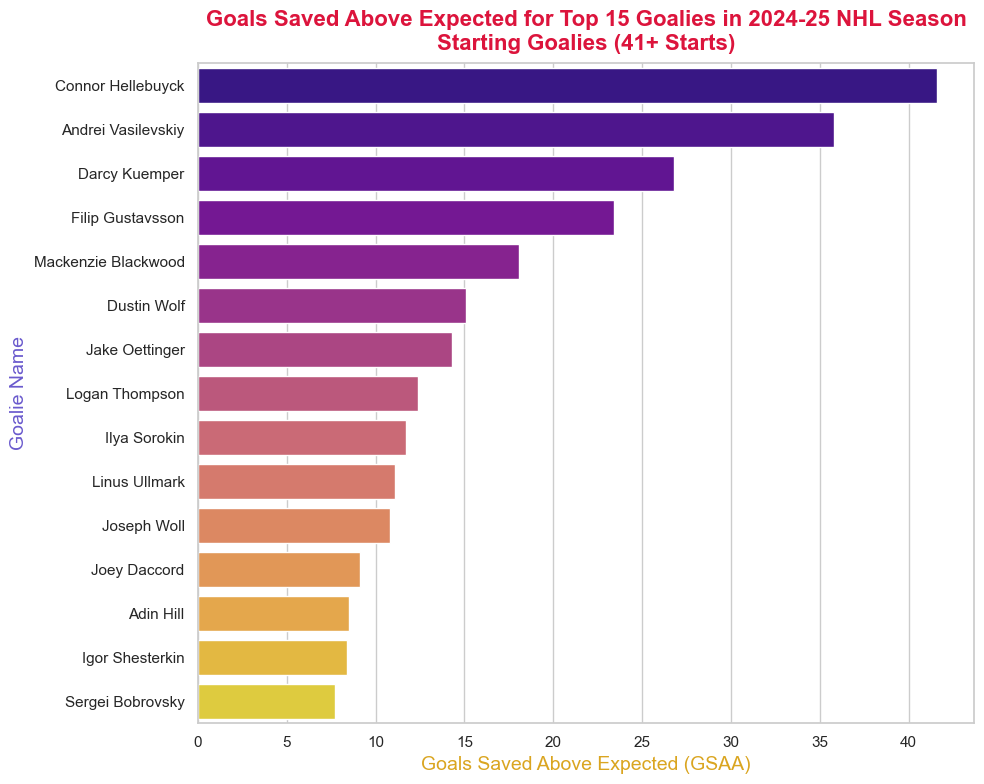

In [33]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_goalies,
    y="name_display",  # y-axis is names (horizontal bars)
    x="gs_above_avg",
    hue="name_display",      
    palette="plasma",
    legend=False     # Needed to Include. Received error message when using 'Palette' without assigning the 'hue'
)

plt.title("Goals Saved Above Expected for Top 15 Goalies in 2024-25 NHL Season\nStarting Goalies (41+ Starts)", 
          fontsize=16, fontweight='bold', fontfamily='sans-serif', color='crimson', pad=10)
plt.xlabel("Goals Saved Above Expected (GSAA)", fontsize=14, fontfamily='sans-serif', color="goldenrod")
plt.ylabel("Goalie Name", fontsize=14, fontfamily='sans-serif', color="slateblue")
plt.tight_layout()
plt.show()

 ## The Five Goalies Who Received the Most Votes for the Vezina Trophy, awarded to the 'goaltender adjudged to be the best at his position' by NHL General Managers were:

### 1. Connor Hellebuyck (Winner)
### 2. Andrei Vasilevskiy
### 3. Darcy Kuemper
### 4. Logan Thompson
### 5. Anthony Stolarz

# Goals Saved Above Expected is a Good Measure of the Top Goalies in the NHL, with the Top 3 Goalies in that Measure being the Same Top 3 Players in Vezina Voting (and in the same order), and the 4th Place Winner in the Top 8 for the 2024-2025 NHL Season

# Question 3: Who were the Top 20 Most Productive (Points Per Game) players in NJ Devils franchise history (who played at least 200 games).

### Updating the URL to be scraped to Answer Question 3

In [34]:
url = "https://www.hockey-reference.com/teams/NJD/skaters.html"
response = requests.get(url)
soup = bs(response.content, "html.parser")

In [35]:
stats_table = soup.find("table", {"id": "player_stats"})

### Checking to Make Sure that this Variable Successfully Updated from Previous Use Above

In [36]:
stats_table

<table class="stats_table sortable per_toggler row_summable soc" data-autostat-divisor="games" data-autostat-list="['goals','assists','points','plus_minus','pen_min','goals_ev','goals_pp','goals_sh','goals_gw','assists_es','assists_pp','assists_sh','shots','shots_attempted','faceoff_wins','faceoff_losses','blocks','hits','takeaways','giveaways']" data-cols-to-freeze=",2" data-soc-sum-params="null" data-soc-sum-phase-type="reg" data-soc-sum-scope-type="player_season" data-soc-sum-table-type="SkaterStandard" id="player_stats"> <caption>Standard Stats Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr class="over_header"> <th aria-label=" " class="poptip over_header center" colspan="7" data-stat="header_empty_0"></th> <th aria-label="Scoring" class="poptip over_header center" colspan="3" data-stat="he

### Setting the Desired Stats to be Pulled Based on the HTML Coding Used in Hockey-Reference Site

In [37]:
wanted_stats = ["name_display", "games", "points"]

In [38]:
devils_rows = []

### Loop is set up the same as previous two examples, since the page is set-up similarly as well.
### Need to check against <th> and <td>, then checking each cell for the data set from the 'wanted_stats' above.
### After stripping that text, it is checked to confirm there is not blank/empty data for the row as a placeholder/summation row

In [39]:
for row in stats_table.find_all("tr"):
    row_data = {}
    cells = row.find_all(["th", "td"])
    for cell in cells:
        stat = cell.get("data-stat")
        if stat in wanted_stats:
            row_data[stat] = cell.text.strip()
    if row_data.get("name_display") and "League Average" not in row_data["name_display"]:
        devils_rows.append(row_data)

In [40]:
devils_df = pd.DataFrame(devils_rows)

In [41]:
devils_df["games"] = pd.to_numeric(devils_df["games"], errors="coerce")
devils_df["points"] = pd.to_numeric(devils_df["points"], errors="coerce")

### Checking Out Data Frame. The list is filled with prominent NJ Devils skaters.

In [42]:
print(devils_df)

         name_display   games  points
0              Player     NaN     NaN
1        Patrik Eliáš  1240.0  1025.0
2        John MacLean   934.0   701.0
3        Travis Zajac  1024.0   550.0
4         Kirk Muller   556.0   520.0
..                ...     ...     ...
635      Shane Bowers    12.0     0.0
636   Jacob Markström    49.0     0.0
637  Dennis Cholowski     6.0     0.0
638     Daniil Misyul     1.0     0.0
639     Nathan Legare     3.0     0.0

[640 rows x 3 columns]


### This needs to be filtered down quite a bit. First, only those players who played at least 200 Games will be Included in the updated Data Frame

In [43]:
top_devils_df = devils_df[devils_df["games"] >= 200]

In [44]:
top_devils_df

name_display   games  points
1        Patrik Eliáš  1240.0  1025.0
2        John MacLean   934.0   701.0
3        Travis Zajac  1024.0   550.0
4         Kirk Muller   556.0   520.0
5         Scott Gomez   606.0   484.0
..                ...     ...     ...
208  Anton Volchenkov   222.0    32.0
227        Rod Pelley   211.0    26.0
359       Glenn Resch   267.0     7.0
360     Chris Terreri   302.0     7.0
449    Cory Schneider   311.0     3.0

[109 rows x 3 columns]

### Creating a new PPG Column that will be used and will be Calculated by Dividing Games Played ('Games') by Points

In [45]:
top_devils_df["ppg"] = top_devils_df["points"] / top_devils_df["games"]

/var/folders/lp/b3j3v6gx03g5m31fknpjvk640000gn/T/ipykernel_14949/1272196007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_devils_df["ppg"] = top_devils_df["points"] / top_devils_df["games"]


### Checking to make sure new Column added correctly

In [46]:
print(top_devils_df)

         name_display   games  points       ppg
1        Patrik Eliáš  1240.0  1025.0  0.826613
2        John MacLean   934.0   701.0  0.750535
3        Travis Zajac  1024.0   550.0  0.537109
4         Kirk Muller   556.0   520.0  0.935252
5         Scott Gomez   606.0   484.0  0.798680
..                ...     ...     ...       ...
208  Anton Volchenkov   222.0    32.0  0.144144
227        Rod Pelley   211.0    26.0  0.123223
359       Glenn Resch   267.0     7.0  0.026217
360     Chris Terreri   302.0     7.0  0.023179
449    Cory Schneider   311.0     3.0  0.009646

[109 rows x 4 columns]


### Getting the Top 20 NJ Devils by their PPG

In [47]:
top20_ppg = top_devils_df.sort_values("ppg", ascending=False).head(20)

### Looking at final Data Frame

In [48]:
print(top20_ppg)

        name_display   games  points       ppg
41       Taylor Hall   211.0   208.0  0.985782
16       Jack Hughes   368.0   351.0  0.953804
4        Kirk Muller   556.0   520.0  0.935252
43    Ilya Kovalchuk   222.0   201.0  0.905405
17     Wilf Paiement   392.0   336.0  0.857143
1       Patrik Eliáš  1240.0  1025.0  0.826613
12       Zach Parise   502.0   410.0  0.816733
9       Jesper Bratt   552.0   447.0  0.809783
30  Patrik Sundström   305.0   246.0  0.806557
11     Nico Hischier   527.0   422.0  0.800759
5        Scott Gomez   606.0   484.0  0.798680
47     Peter Šťastný   217.0   173.0  0.797235
25   Stéphane Richer   360.0   283.0  0.786111
35      Mel Bridgman   288.0   224.0  0.777778
33      Mark Johnson   305.0   229.0  0.750820
2       John MacLean   934.0   701.0  0.750535
14       Petr Sýkora   527.0   394.0  0.747628
8       Aaron Broten   641.0   469.0  0.731669
34  Brendan Shanahan   315.0   228.0  0.723810
23    Claude Lemieux   423.0   297.0  0.702128


### Creating a Visualization for this Data

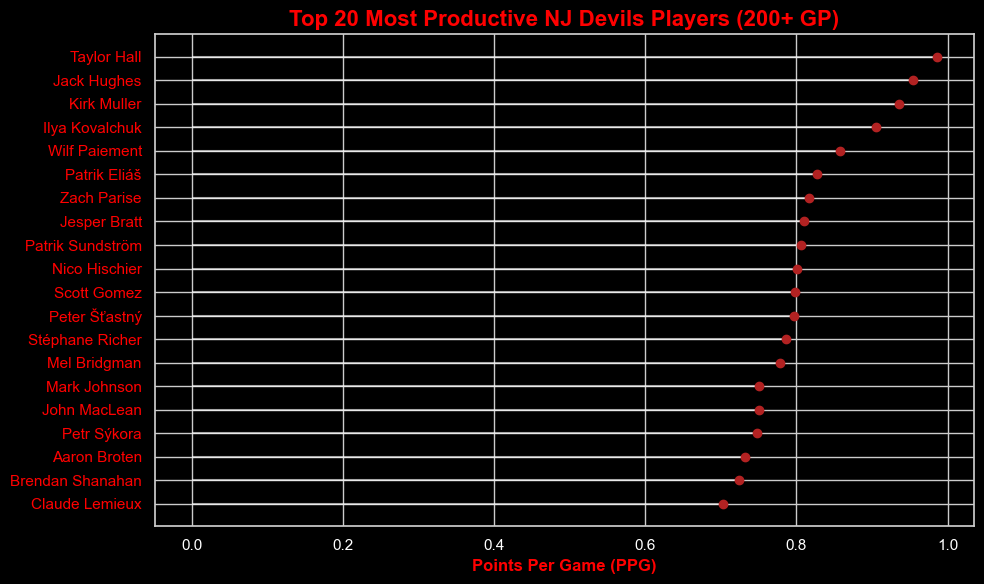

In [49]:
plt.figure(figsize=(10, 6), facecolor='black')  # Changing the background of the graph to black
ax = plt.gca()
ax.set_facecolor('black')  # Setting axes background to black as well

#Creating the horizontal lines for this plot
plt.hlines(
    y=top20_ppg["name_display"], 
    xmin=0, 
    xmax=top20_ppg["ppg"], 
    color="white", 
    alpha=0.6
)

#Adding the 'dots'
plt.plot(
    top20_ppg["ppg"], 
    top20_ppg["name_display"], 
    "o", 
    color="firebrick"
)

#Setting Labels for Axes
plt.xlabel("Points Per Game (PPG)", color='red', weight='bold')
plt.title("Top 20 Most Productive NJ Devils Players (200+ GP)", fontsize=16, weight='bold', color='red')

#Updating the axis parameters colors to red & white
ax.tick_params(axis='y', colors='red')
ax.tick_params(axis='x', colors='white')

#Inverting Y-Axis so that the Most Productive Player is on Top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# The Top 20 Most Productive (Highest PPG) NJ Devils in Franchise History are Shown Above. Several of these Players are on the Active Roster (Jack Hughes, Nico Hischier, Jesper Bratt), but No Devil who has Played At Least 200 Games has Yet to be a PPG (1.0) Player

# Question 4: Which 5 teams do the Devils have the greatest average goal differential (Average Goals/Game - Goals Against/Game) of all time and are those the same 5 teams with the highest Points Percentage against?

### Once again, the URL being used for Scraping will Need to be Changed and Set

In [50]:
url = "https://www.hockey-reference.com/teams/NJD/head2head.html"
response = requests.get(url)
soup = bs(response.content, "html.parser")

In [51]:
stats_table = soup.find("table", {"id": "head2head"})

### Checking to make sure the site has changed successfully

In [52]:
print(stats_table)

<table class="sortable stats_table" data-cols-to-freeze=",2" id="head2head">
<caption>Head-to-Head vs. Opponents Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rk" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label="Franchise" class="poptip sort_default_asc left" data-stat="opp_franch_name" scope="col">Franchise</th>
<th aria-label="GP" class="poptip center" data-stat="games" data-tip="Games Played" scope="col">GP</th>
<th aria-label="W" class="poptip center" data-stat="wins" data-tip="Wins" scope="col">W</th>
<th aria-label="L" class="poptip center" data-stat="losses" data-tip="Losses" scope="col">L</th>
<th aria-label="T" class="poptip center" data-stat="ties" data-tip="Ties" scope="col">T</th>
<th aria-label="OL" class="poptip center" data-stat="losses_ot" data-tip="Overtime/Shootout Losses (2000 

### This webpage is organized a bit cleaner than the others. There are several tables on the site, but it the HTML code is more readable

### Setting the desired stats to be used for the columns to build this Question's Data Frame

In [53]:
wanted_stats = ["opp_franch_name", "goals_per_game", "opp_goals_per_game", "points_pct"]

In [54]:
teams_rows = []

In [55]:
for row in stats_table.find_all("tr"):
    row_data = {}
    cells = row.find_all(["th", "td"])
    for cell in cells:
        stat = cell.get("data-stat")
        if stat in wanted_stats:
            row_data[stat] = cell.text.strip()
    if row_data.get("opp_franch_name"):
        teams_rows.append(row_data)

In [56]:
teams_df = pd.DataFrame(teams_rows)

### Checking Current Data Frame

In [57]:
print(teams_df)

          opp_franch_name points_pct goals_per_game opp_goals_per_game
0               Franchise       PTS%           GF/G               GA/G
1           Anaheim Ducks       .554           2.80               2.61
2           Boston Bruins       .417           2.57               3.31
3          Buffalo Sabres       .497           2.93               3.19
4     Carolina Hurricanes       .568           3.07               2.86
5   Columbus Blue Jackets       .500           2.57               2.70
6          Calgary Flames       .320           2.68               3.87
7      Chicago Blackhawks       .516           3.08               3.28
8        Cleveland Barons       .531           2.75               2.88
9      Colorado Avalanche       .480           3.07               3.29
10           Dallas Stars       .458           2.90               3.18
11      Detroit Red Wings       .479           3.09               3.32
12        Edmonton Oilers       .500           3.25               3.55
13    

In [58]:
teams_df["goals_per_game"] = pd.to_numeric(teams_df["goals_per_game"], errors="coerce")
teams_df["opp_goals_per_game"] = pd.to_numeric(teams_df["opp_goals_per_game"], errors="coerce")
teams_df["points_pct"] = pd.to_numeric(teams_df["points_pct"], errors="coerce")

### Removing that Top Row from the Data Frame

In [59]:
teams_df = teams_df[teams_df["opp_franch_name"] != "Franchise"]

### Confirming it was successfully removed

In [60]:
teams_df

opp_franch_name  points_pct  goals_per_game  opp_goals_per_game
1           Anaheim Ducks       0.554            2.80                2.61
2           Boston Bruins       0.417            2.57                3.31
3          Buffalo Sabres       0.497            2.93                3.19
4     Carolina Hurricanes       0.568            3.07                2.86
5   Columbus Blue Jackets       0.500            2.57                2.70
6          Calgary Flames       0.320            2.68                3.87
7      Chicago Blackhawks       0.516            3.08                3.28
8        Cleveland Barons       0.531            2.75                2.88
9      Colorado Avalanche       0.480            3.07                3.29
10           Dallas Stars       0.458            2.90                3.18
11      Detroit Red Wings       0.479            3.09                3.32
12        Edmonton Oilers       0.500            3.25                3.55
13       Florida Panthers       0.603            2.89                2.42
14      Los Angeles Kings       0.430            3.00                3.62
15         Minnesota Wild       0.652            3.12                2.82
16     Montreal Canadiens       0.520            2.87                3.08
17    Nashville Predators       0.564            2.97                2.85
18     New York Islanders       0.437            2.82                3.35
19       New York Rangers       0.484            2.96                3.31
20        Ottawa Senators       0.631            2.76                2.49
21    Philadelphia Flyers       0.513            2.97                3.20
22        Arizona Coyotes       0.448            2.92                3.17
23    Pittsburgh Penguins       0.536            3.22                3.20
24         Seattle Kraken       0.875            3.00                2.13
25        San Jose Sharks       0.549            2.84                2.65
26        St. Louis Blues       0.425            2.97                3.40
27    Tampa Bay Lightning       0.614            3.14                2.66
28    Toronto Maple Leafs       0.446            2.94                3.34
29           Utah Mammoth       1.000            3.00                0.50
30      Vancouver Canucks       0.468            2.95                3.26
31   Vegas Golden Knights       0.393            2.86                3.29
32          Winnipeg Jets       0.555            2.81                2.70
33    Washington Capitals       0.452            2.87                3.37

### Create a New Column for the 'Net' of the Goals For Per Game - Goals Against

In [61]:
teams_df["net_goals"] = teams_df["goals_per_game"] - teams_df["opp_goals_per_game"]

### Checking on Change

In [62]:
teams_df

opp_franch_name  points_pct  goals_per_game  opp_goals_per_game  \
1           Anaheim Ducks       0.554            2.80                2.61   
2           Boston Bruins       0.417            2.57                3.31   
3          Buffalo Sabres       0.497            2.93                3.19   
4     Carolina Hurricanes       0.568            3.07                2.86   
5   Columbus Blue Jackets       0.500            2.57                2.70   
6          Calgary Flames       0.320            2.68                3.87   
7      Chicago Blackhawks       0.516            3.08                3.28   
8        Cleveland Barons       0.531            2.75                2.88   
9      Colorado Avalanche       0.480            3.07                3.29   
10           Dallas Stars       0.458            2.90                3.18   
11      Detroit Red Wings       0.479            3.09                3.32   
12        Edmonton Oilers       0.500            3.25                3.55   
13       Florida Panthers       0.603            2.89                2.42   
14      Los Angeles Kings       0.430            3.00                3.62   
15         Minnesota Wild       0.652            3.12                2.82   
16     Montreal Canadiens       0.520            2.87                3.08   
17    Nashville Predators       0.564            2.97                2.85   
18     New York Islanders       0.437            2.82                3.35   
19       New York Rangers       0.484            2.96                3.31   
20        Ottawa Senators       0.631            2.76                2.49   
21    Philadelphia Flyers       0.513            2.97                3.20   
22        Arizona Coyotes       0.448            2.92                3.17   
23    Pittsburgh Penguins       0.536            3.22                3.20   
24         Seattle Kraken       0.875            3.00                2.13   
25        San Jose Sharks       0.549            2.84                2.65   
26        St. Louis Blues       0.425            2.97                3.40   
27    Tampa Bay Lightning       0.614            3.14                2.66   
28    Toronto Maple Leafs       0.446            2.94                3.34   
29           Utah Mammoth       1.000            3.00                0.50   
30      Vancouver Canucks       0.468            2.95                3.26   
31   Vegas Golden Knights       0.393            2.86                3.29   
32          Winnipeg Jets       0.555            2.81                2.70   
33    Washington Capitals       0.452            2.87                3.37   

    net_goals  
1        0.19  
2       -0.74  
3       -0.26  
4        0.21  
5       -0.13  
6       -1.19  
7       -0.20  
8       -0.13  
9       -0.22  
10      -0.28  
11      -0.23  
12      -0.30  
13       0.47  
14      -0.62  
15       0.30  
16      -0.21  
17       0.12  
18      -0.53  
19      -0.35  
20       0.27  
21      -0.23  
22      -0.25  
23       0.02  
24       0.87  
25       0.19  
26      -0.43  
27       0.48  
28      -0.40  
29       2.50  
30      -0.31  
31      -0.43  
32       0.11  
33      -0.50

### Updating Column Names to Make Them More Readable

In [63]:
teams_df = teams_df.rename(columns={
    "opp_franch_name": "Team Name",
    "points_pct": "P%",
    "goals_per_game": "GF/G",
    "opp_goals_per_game": "GA/G"
})


### Creating New Data Frame to Show Top 5 Teams Based on the 'Net Goals' Value Created

In [64]:
net_goals = teams_df = teams_df.sort_values(by="net_goals", ascending=False).reset_index(drop=True)

In [65]:
net_goals

Team Name     P%  GF/G  GA/G  net_goals
0            Utah Mammoth  1.000  3.00  0.50       2.50
1          Seattle Kraken  0.875  3.00  2.13       0.87
2     Tampa Bay Lightning  0.614  3.14  2.66       0.48
3        Florida Panthers  0.603  2.89  2.42       0.47
4          Minnesota Wild  0.652  3.12  2.82       0.30
5         Ottawa Senators  0.631  2.76  2.49       0.27
6     Carolina Hurricanes  0.568  3.07  2.86       0.21
7           Anaheim Ducks  0.554  2.80  2.61       0.19
8         San Jose Sharks  0.549  2.84  2.65       0.19
9     Nashville Predators  0.564  2.97  2.85       0.12
10          Winnipeg Jets  0.555  2.81  2.70       0.11
11    Pittsburgh Penguins  0.536  3.22  3.20       0.02
12       Cleveland Barons  0.531  2.75  2.88      -0.13
13  Columbus Blue Jackets  0.500  2.57  2.70      -0.13
14     Chicago Blackhawks  0.516  3.08  3.28      -0.20
15     Montreal Canadiens  0.520  2.87  3.08      -0.21
16     Colorado Avalanche  0.480  3.07  3.29      -0.22
17      Detroit Red Wings  0.479  3.09  3.32      -0.23
18    Philadelphia Flyers  0.513  2.97  3.20      -0.23
19        Arizona Coyotes  0.448  2.92  3.17      -0.25
20         Buffalo Sabres  0.497  2.93  3.19      -0.26
21           Dallas Stars  0.458  2.90  3.18      -0.28
22        Edmonton Oilers  0.500  3.25  3.55      -0.30
23      Vancouver Canucks  0.468  2.95  3.26      -0.31
24       New York Rangers  0.484  2.96  3.31      -0.35
25    Toronto Maple Leafs  0.446  2.94  3.34      -0.40
26        St. Louis Blues  0.425  2.97  3.40      -0.43
27   Vegas Golden Knights  0.393  2.86  3.29      -0.43
28    Washington Capitals  0.452  2.87  3.37      -0.50
29     New York Islanders  0.437  2.82  3.35      -0.53
30      Los Angeles Kings  0.430  3.00  3.62      -0.62
31          Boston Bruins  0.417  2.57  3.31      -0.74
32         Calgary Flames  0.320  2.68  3.87      -1.19

In [66]:
net_goals_five = net_goals.head()

### Creating a Final Data Frame to Show Only the Top 5 Teams The NJ Devils Performed Best against Based on the Difference between Goals For/Against Average

In [67]:
net_goals_five

Team Name     P%  GF/G  GA/G  net_goals
0         Utah Mammoth  1.000  3.00  0.50       2.50
1       Seattle Kraken  0.875  3.00  2.13       0.87
2  Tampa Bay Lightning  0.614  3.14  2.66       0.48
3     Florida Panthers  0.603  2.89  2.42       0.47
4       Minnesota Wild  0.652  3.12  2.82       0.30

### Creating a Data Frame to Show the Top 5 Teams Based on Win Percentage (P%)

In [68]:
win_percent = teams_df = teams_df.sort_values(by="P%", ascending=False).reset_index(drop=True)

In [69]:
win_percent

Team Name     P%  GF/G  GA/G  net_goals
0            Utah Mammoth  1.000  3.00  0.50       2.50
1          Seattle Kraken  0.875  3.00  2.13       0.87
2          Minnesota Wild  0.652  3.12  2.82       0.30
3         Ottawa Senators  0.631  2.76  2.49       0.27
4     Tampa Bay Lightning  0.614  3.14  2.66       0.48
5        Florida Panthers  0.603  2.89  2.42       0.47
6     Carolina Hurricanes  0.568  3.07  2.86       0.21
7     Nashville Predators  0.564  2.97  2.85       0.12
8           Winnipeg Jets  0.555  2.81  2.70       0.11
9           Anaheim Ducks  0.554  2.80  2.61       0.19
10        San Jose Sharks  0.549  2.84  2.65       0.19
11    Pittsburgh Penguins  0.536  3.22  3.20       0.02
12       Cleveland Barons  0.531  2.75  2.88      -0.13
13     Montreal Canadiens  0.520  2.87  3.08      -0.21
14     Chicago Blackhawks  0.516  3.08  3.28      -0.20
15    Philadelphia Flyers  0.513  2.97  3.20      -0.23
16  Columbus Blue Jackets  0.500  2.57  2.70      -0.13
17        Edmonton Oilers  0.500  3.25  3.55      -0.30
18         Buffalo Sabres  0.497  2.93  3.19      -0.26
19       New York Rangers  0.484  2.96  3.31      -0.35
20     Colorado Avalanche  0.480  3.07  3.29      -0.22
21      Detroit Red Wings  0.479  3.09  3.32      -0.23
22      Vancouver Canucks  0.468  2.95  3.26      -0.31
23           Dallas Stars  0.458  2.90  3.18      -0.28
24    Washington Capitals  0.452  2.87  3.37      -0.50
25        Arizona Coyotes  0.448  2.92  3.17      -0.25
26    Toronto Maple Leafs  0.446  2.94  3.34      -0.40
27     New York Islanders  0.437  2.82  3.35      -0.53
28      Los Angeles Kings  0.430  3.00  3.62      -0.62
29        St. Louis Blues  0.425  2.97  3.40      -0.43
30          Boston Bruins  0.417  2.57  3.31      -0.74
31   Vegas Golden Knights  0.393  2.86  3.29      -0.43
32         Calgary Flames  0.320  2.68  3.87      -1.19

### Creating the Final Data Frame with Just the Top 5 Teams Based on Win Percentage

In [70]:
top_win_percent = win_percent.head()

In [71]:
### Showing that Final Data Frame with Top 5 Teams Based on NJ Devils Win Percentage Against

In [72]:
top_win_percent

Team Name     P%  GF/G  GA/G  net_goals
0         Utah Mammoth  1.000  3.00  0.50       2.50
1       Seattle Kraken  0.875  3.00  2.13       0.87
2       Minnesota Wild  0.652  3.12  2.82       0.30
3      Ottawa Senators  0.631  2.76  2.49       0.27
4  Tampa Bay Lightning  0.614  3.14  2.66       0.48

# There is significant overlap between the Teams that the NJ Devils fared Best against Based on their Winning Percentage and their Goals Scored Differential. Utah and Seattle do skew the data a bit, as they are brand new franchises. Therefore, for those remaining franchises, it appears as though the Devils have performed best against the Minnesota Wild and the Tampa Bay Lightning, as both have places in the Top 5 for both measures.

In [ ]:
# Works Cited

In [ ]:
### OpenAI. (2025, August 4). ChatGPT (Version GPT-4o) [Large language model]. https://chat.openai.com/chat